In [1]:
"""
This uses the CSV file containing session logs and webschedule info
to represent and display the data in a pandas DataFrame.
A DataFrame is essentially a table with rows and columns.
### It is recommended to use Jupyter Notebook to see the DataFrames. ###
"""
import pandas as pd
import os

# CSV file of session logs must be in same directory as this file and named 'data.csv'
cwd = os.getcwd()  # get current working directory as str
df = pd.read_csv(cwd + "/data.csv")  # make DataFrame from CSV

In [2]:
# Set pandas settings - # of rows and cols to display, change it to change # of rows/cols to show
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
df

,Unnamed: 0,"""Name""",Services,Course,SignInTime,SignOutTime,Period,Tutor
0,0,Jojo,No Sessions,NaN,NaN,NaN,NaN,NaN
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,Thiri Wai Wai
...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,NaN


In [4]:
# Rename columns for name clarity
df = df.rename(columns={'Unnamed: 0' : 'ID'})
df = df.rename(columns={'Services' : 'Service'})
df = df.rename(columns={'Period' : 'Duration'})

In [5]:
# Filter out 'No Sessions' - don't know what 'No Sessions' means, may have to ask Bryan
filt = (df['Service'] != 'No Sessions')
df = df[filt]

In [6]:
df

,ID,"""Name""",Service,Course,SignInTime,SignOutTime,Duration,Tutor
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,Thiri Wai Wai
5,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,NaN
...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,NaN


In [7]:
# Convert SignIn and SignOut times to 'datetime' objects so we can get attributes of the 'datetime' (ex. hour)
df['SignInTime'] = pd.to_datetime(df['SignInTime'])
df['SignOutTime'] = pd.to_datetime(df['SignOutTime'])
# Add 'HourIn', 'HourOut', 'Weekday' columns
df.insert(7, 'HourIn', df['SignInTime'].apply(lambda x : x.hour))  # get hour and weekday attributes from 'datetime' obj,
df.insert(8, 'HourOut', df['SignOutTime'].apply(lambda x : x.hour))     # insert at specified column index (ex. 7)
df.insert(9, 'Weekday', df['SignInTime'].apply(lambda x : x.weekday())) # to keep desired column order

In [8]:
df

,ID,"""Name""",Service,Course,SignInTime,SignOutTime,Duration,HourIn,HourOut,Weekday,Tutor
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,9,9,4,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,11,11,2,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,9,10,2,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,9,10,2,Thiri Wai Wai
5,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,14,17,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,14,17,3,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,13,13,3,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,11,12,2,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,10,10,2,NaN


In [9]:
# Filter out bad SignIn, SignOutTimes - sessions not within 8AM-8PM and not weekdays
# (students signed in when STEM Center closed)
filt = (
    (df['HourIn'] >= 8) & (df['HourIn'] <= 20) &
    (df['HourOut'] >= 8) & (df['HourOut'] <= 20) & (df['Weekday'] <= 4)
)
df = df[filt]

In [10]:
df

,ID,"""Name""",Service,Course,SignInTime,SignOutTime,Duration,HourIn,HourOut,Weekday,Tutor
1,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,9,9,4,Thiri Wai Wai
2,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,11,11,2,Hilary Lin
3,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,9,10,2,NaN
4,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,9,10,2,Thiri Wai Wai
5,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,14,17,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9696,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,14,17,3,NaN
9697,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,13,13,3,NaN
9698,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,11,12,2,NaN
9699,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,10,10,2,NaN


In [11]:
# Reset row indices to start at 0, needed to iterate through the DataFrame rows
df.reset_index(drop=True, inplace=True)  

In [12]:
df

,ID,"""Name""",Service,Course,SignInTime,SignOutTime,Duration,HourIn,HourOut,Weekday,Tutor
0,1,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-07 09:05:00,2022-10-07 09:16:00,00:11:00,9,9,4,Thiri Wai Wai
1,2,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-10-05 11:17:00,2022-10-05 11:59:00,00:42:00,11,11,2,Hilary Lin
2,3,Shayla,Space to Study (STEM Center),NaN,2022-09-28 09:03:00,2022-09-28 10:06:00,01:03:00,9,10,2,NaN
3,4,Shayla,In-person Tutoring (STEM Center),[MATH-252]Calcu/Analytic Geometry II,2022-09-21 09:50:00,2022-09-21 10:05:00,00:15:00,9,10,2,Thiri Wai Wai
4,5,Shayla,Space to Study (STEM Center),NaN,2022-09-19 14:11:00,2022-09-19 17:41:00,03:30:00,14,17,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8042,9696,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 14:58:00,2022-08-18 17:53:00,02:55:00,14,17,3,NaN
8043,9697,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-18 13:05:00,2022-08-18 13:48:00,00:43:00,13,13,3,NaN
8044,9698,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 11:03:00,2022-08-17 12:56:00,01:53:00,11,12,2,NaN
8045,9699,Non-STEM Registered,Space to Study (STEM Center),NaN,2022-08-17 10:27:00,2022-08-17 10:50:00,00:23:00,10,10,2,NaN


In [13]:
df['Service'].value_counts()  # just a useful function - *does nothing*

Space to Study (STEM Center)        3653
Open Lab (TBA Hours)                2166
In-person Tutoring (STEM Center)     985
Space to Study (MESA)                784
Virtual Tutoring                     281
Workshop Attendance                  153
Fabrication Lab                       25
Name: Service, dtype: int64

In [14]:
def make_df_week():
    """
    Makes an empty DataFrame representing the number of sessions for each hour 8AM-8PM, M-F.

    Returns:
        df (pandas.DataFrame): Shape (13, 5) Empty DataFrame representing
        the number of sessions for each hour 8AM-8PM, M-F, to be updated.
    """
    # Make dataframe with dictionary, 13 hours 8AM-8PM, M-F
    d = {
        'M'  : [0] * 13,
        'T'  : [0] * 13,
        'W'  : [0] * 13,
        'Th' : [0] * 13,
        'F'  : [0] * 13,
    }
    df = pd.DataFrame(d)
    df.index += 8  # add all indices (by default they start at 0) by 8 to get 8AM-8PM
    return df

In [15]:
make_df_week()  # this is what it looks like

,M,T,W,Th,F
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0
13,0,0,0,0,0
14,0,0,0,0,0
15,0,0,0,0,0
16,0,0,0,0,0
17,0,0,0,0,0


In [16]:
# To filter the DataFrame to only sessions of the passed in service(s),
# we use a pandas.Series of T/F elements representing which sessions we want
def get_filter(services):
    '''
    Makes a boolean T/F pandas.Series (similar to list/dict) that is 
    filter the original DataFrame of all sessions so that it only
    contains sessions that are of the passed in service(s).
    
    Args:
        services (List[str]): list of string(s) of the service(s) to be
        included in the DataFrame.
        
    Returns:
        filt (pandas.Series): A T/F Series (esentially a labeled array) that
        is True if the session is of the passed in service(s), False
        otherwise. Labeled by indices.
    '''
    filt = [False] * df.shape[0]  # boolean list of all False w/ length # of sessions
    # Update the filter for each passed in service in services
    for service in services:
        filt = filt | (df['Service'] == service)  # first iteration converts filt from list to Series obj
    return filt

In [17]:
# Makes week DataFrame of STEM Center hours - this function uses the two above functions
# **maybe change Friday 8AM-4PM b/c STEM Center hours)
def make_df_with_filter(services):
    """
    Makes a DataFrame with the number of sessions for each hour 8AM-8PM M-F
    for the specified type of service(s).

    Args:
        services (List[str]): list of string(s) of the services to be
        included in the DataFrame.

    Returns:
        df_week (pandas.DataFrame): A week DataFrame containing the number
        of sessions for the specified service filters.
    """
    # Get T/F Series of given service(s), use it to get filtered DataFrame
    filt = get_filter(services)  # make Series filter
    filt_df = df[filt]  # make filtered DataFrame
    filt_df.reset_index(drop=True, inplace=True)  # reset row indices to start at 0, needed to iterate over filt_df
    
    df_week = make_df_week()  # make empty week DataFrame
    
    # Add # of sessions to week DataFrame using 'HourIn', 'HourOut', and 'Weekday' values as indices
    # Loop each row in filtered df
    for i in range(filt_df.shape[0]):
        # Get hourIn, hourOut, and weekday of i'th row
        hourIn  = filt_df['HourIn'][i]
        hourOut = filt_df['HourOut'][i]
        weekday = filt_df['Weekday'][i]
        
        # Add 1 to df_week for each hour signed in from hourIn to hourOut inclusive
        # **EVENTUALLY MIGHT CHANGE TO PRECISION TO THE MINUTE**
        for hour in range(hourIn, hourOut + 1):
            df_week.loc[hour][weekday] += 1  # +1 indicates one student session at this hour and day
    return df_week

In [18]:
# doin' some testin'
filt = get_filter(
    [
        'In-person Tutoring (STEM Center)',
        'Space to Study (STEM Center)',
        'Open Lab (TBA Hours)',
        'Virtual Tutoring'
    ]
)
df[filt]['Service'].value_counts()  # another cool function

Space to Study (STEM Center)        3653
Open Lab (TBA Hours)                2166
In-person Tutoring (STEM Center)     985
Virtual Tutoring                     281
Name: Service, dtype: int64

In [19]:
# The MAIN line right here!
# Gets week DataFrame showing # of sessions at the hour and weekday students used the passed in service(s)
# Feel free to test out different services - keep in mind that the strings in the list must be spelled precisely
df_week = make_df_with_filter(  # passes in *list of strings
    [
        'Space to Study (STEM Center)',
        'Open Lab (TBA Hours)',
        'In-person Tutoring (STEM Center)',
        'Space to Study (MESA)',
        'Virtual Tutoring',
        'Workshop Attendance',
        'Fabrication Lab'
    ]
)
df_week

,M,T,W,Th,F
8,67,62,61,56,73
9,183,165,190,173,196
10,437,275,464,276,269
11,382,355,462,390,348
12,514,402,586,407,415
13,537,389,571,312,392
14,396,390,353,320,308
15,333,366,328,299,222
16,558,377,482,308,112
17,461,323,435,284,23


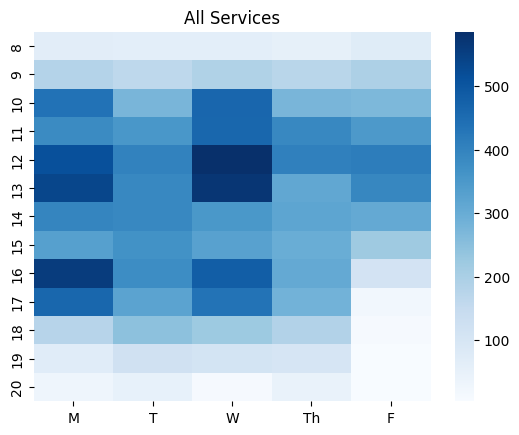

In [20]:
# Display DataFrame as basic "heatmap"
import seaborn as sns
heatmap = sns.heatmap(df_week, cmap='Blues').set_title('All Services')

In [21]:
# This is needed to display heatmap from terminal
import matplotlib.pyplot as plt
plt.show()